In [6]:
# Import necessary libraries
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

sys.path.append('../scripts')  # Import path
from data_preprocessing import load_data  # Assume this function loads the data

In [8]:
# Load dataset
data_path = '../data/data.csv'
df = load_data(data_path)

In [9]:
# Overview of the dataset
print("Number of Rows and Columns:", df.shape)
print("Data Types:\n", df.dtypes)

Number of Rows and Columns: (95662, 16)
Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [10]:
# Summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


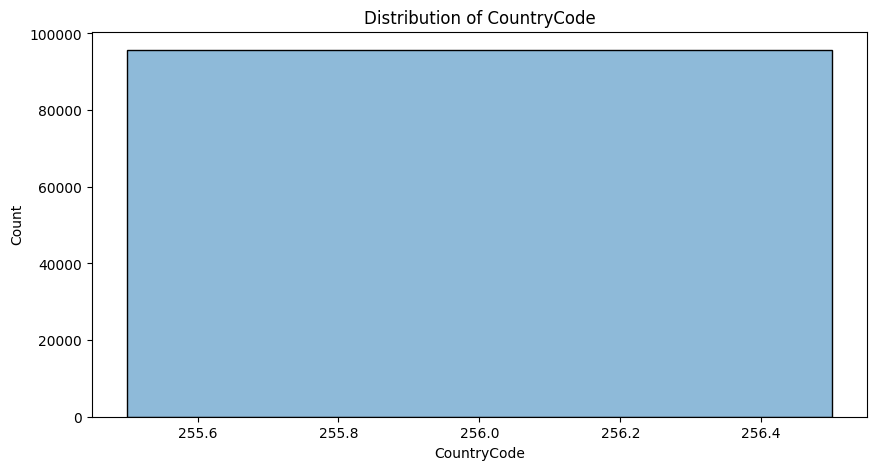

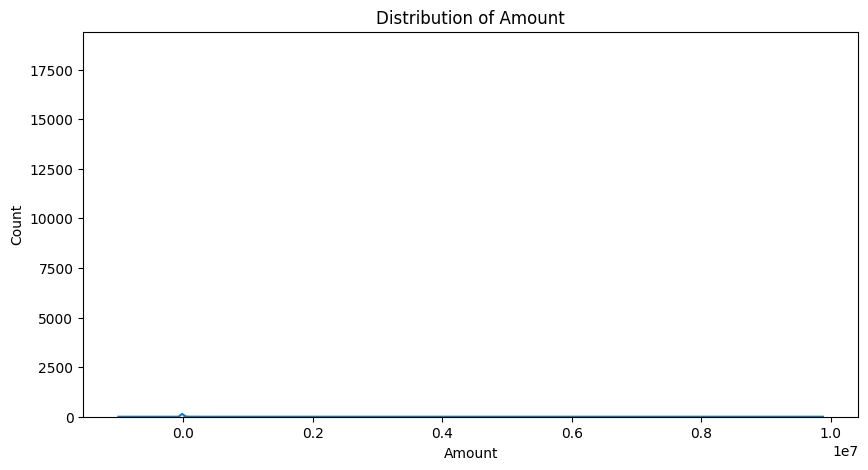

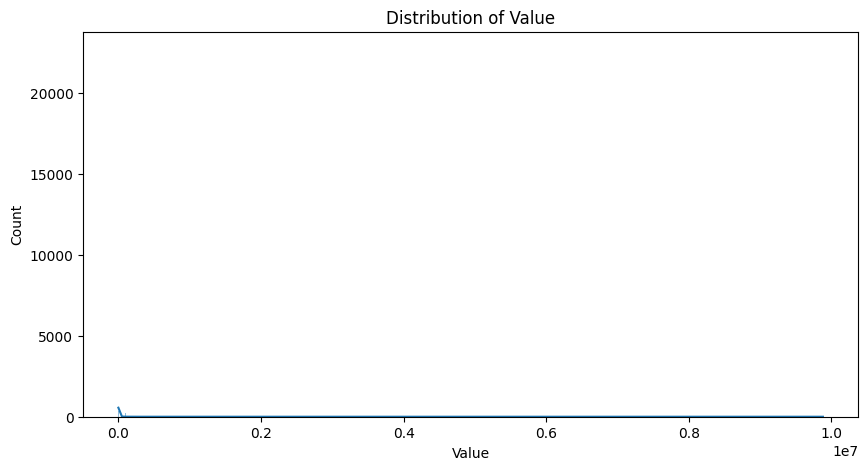

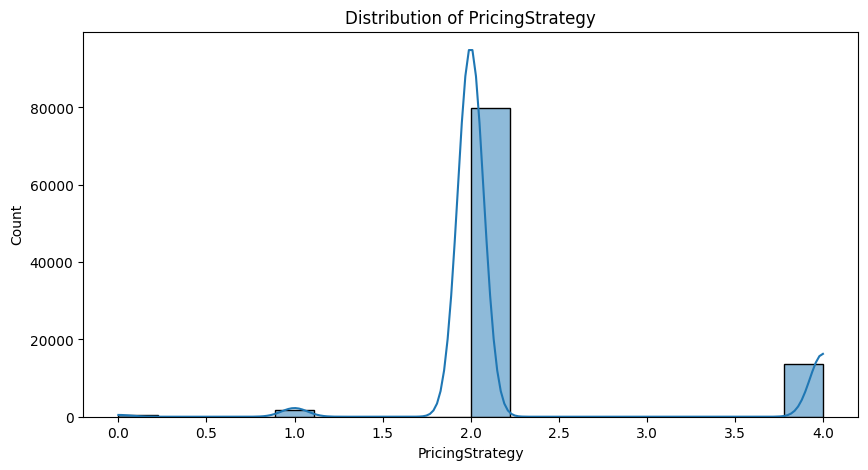

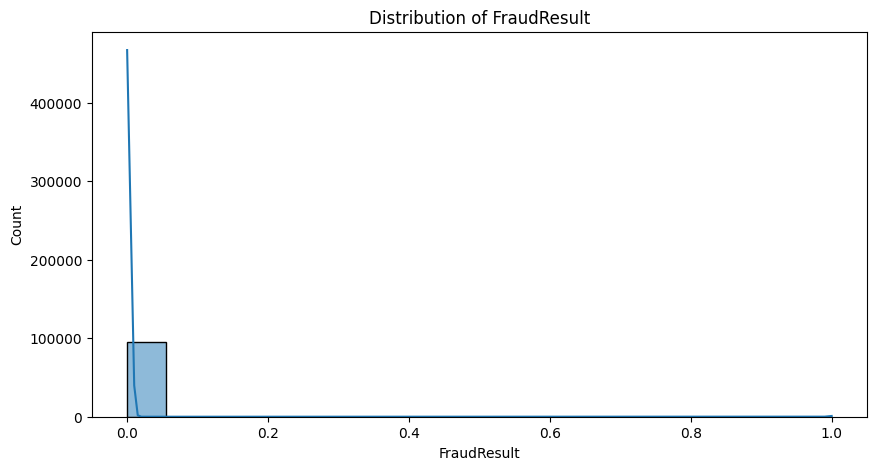

In [11]:
# Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

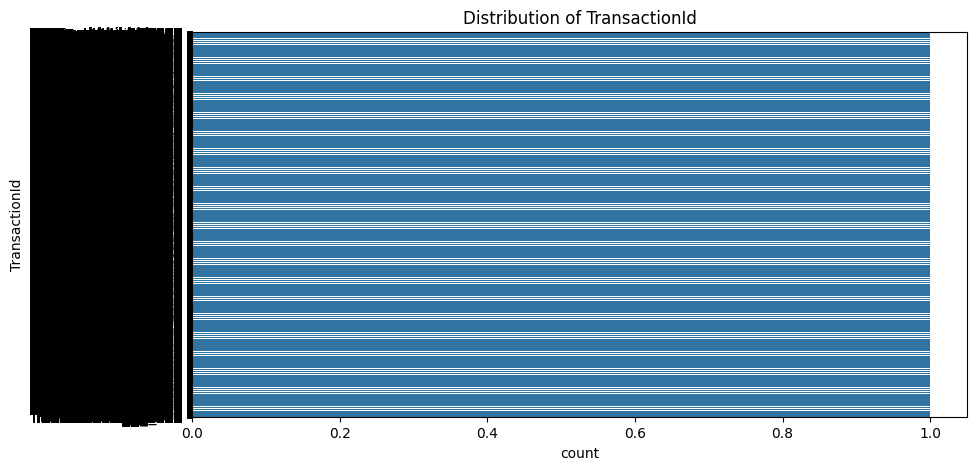

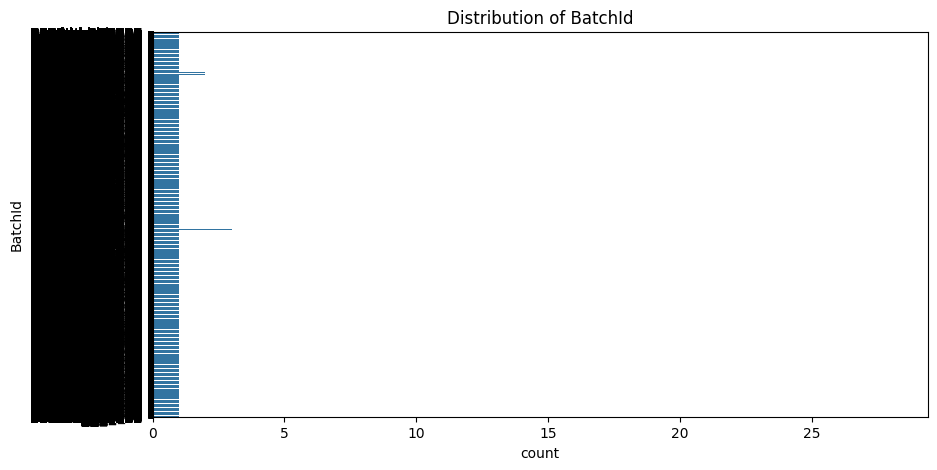

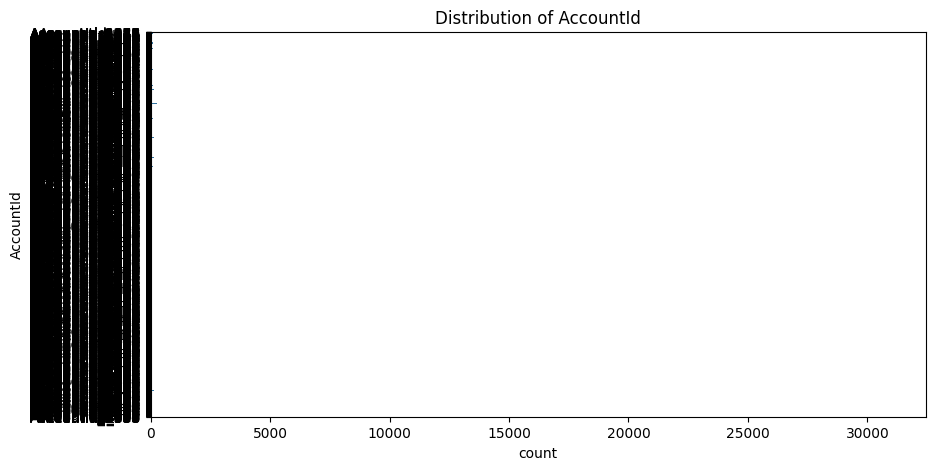

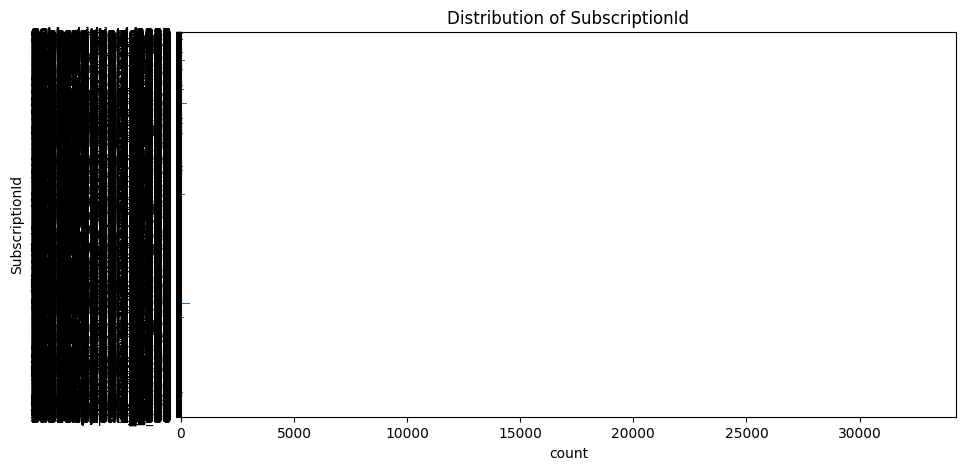

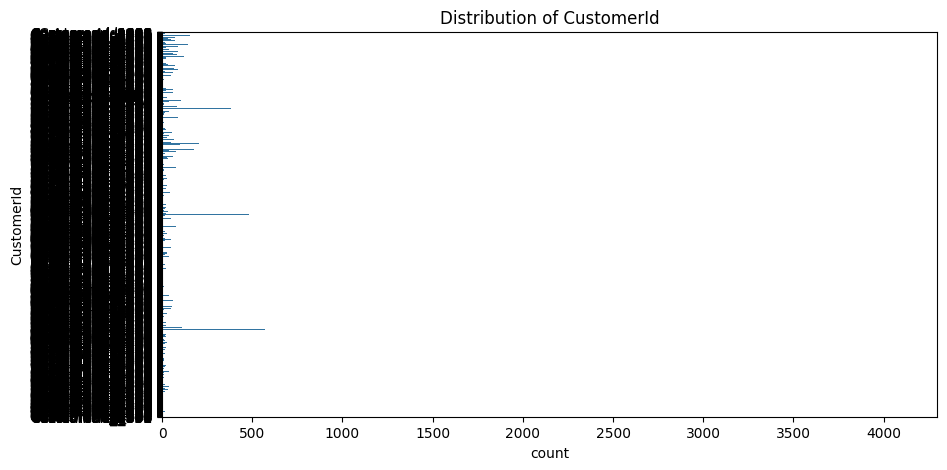

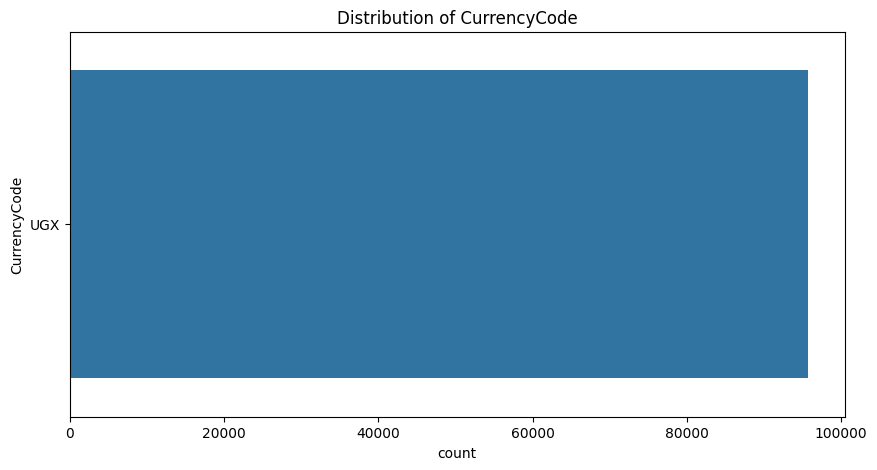

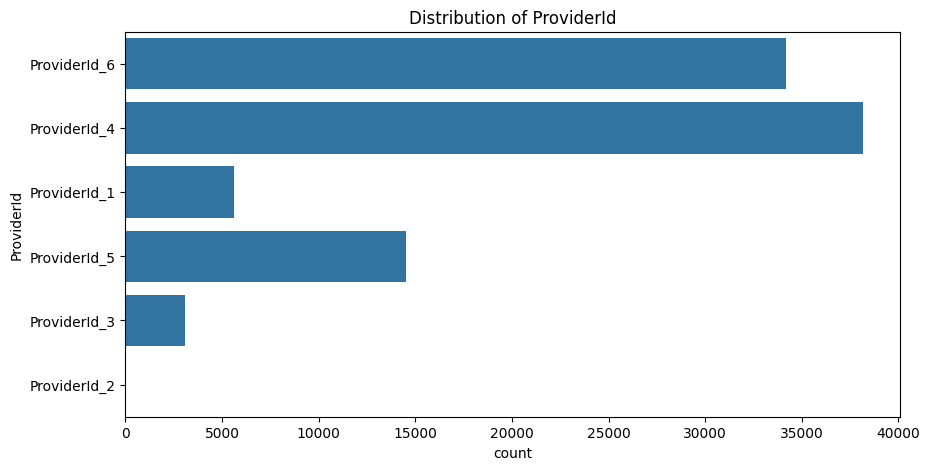

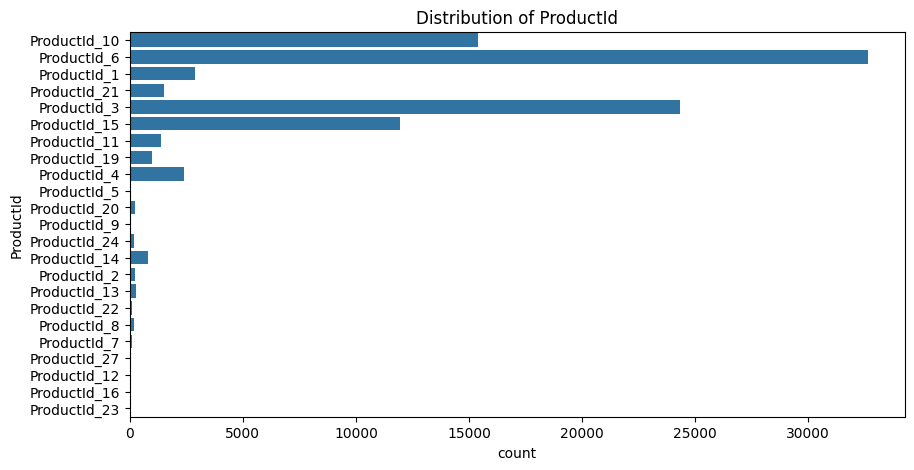

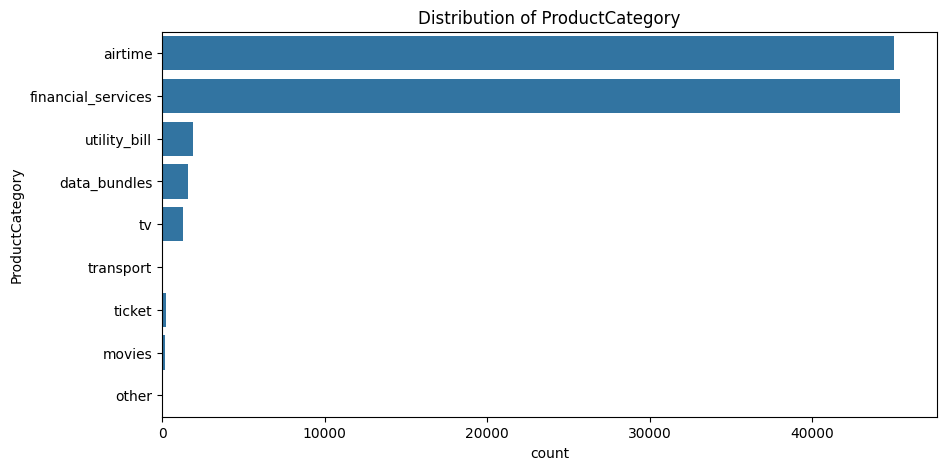

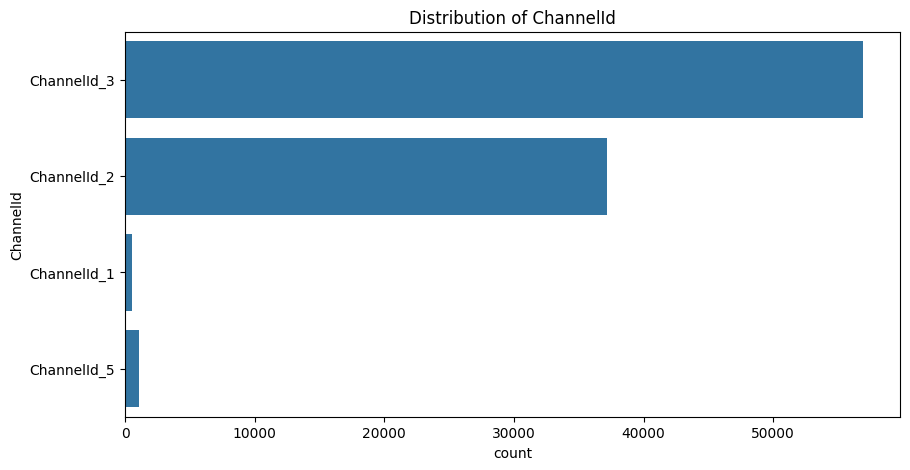

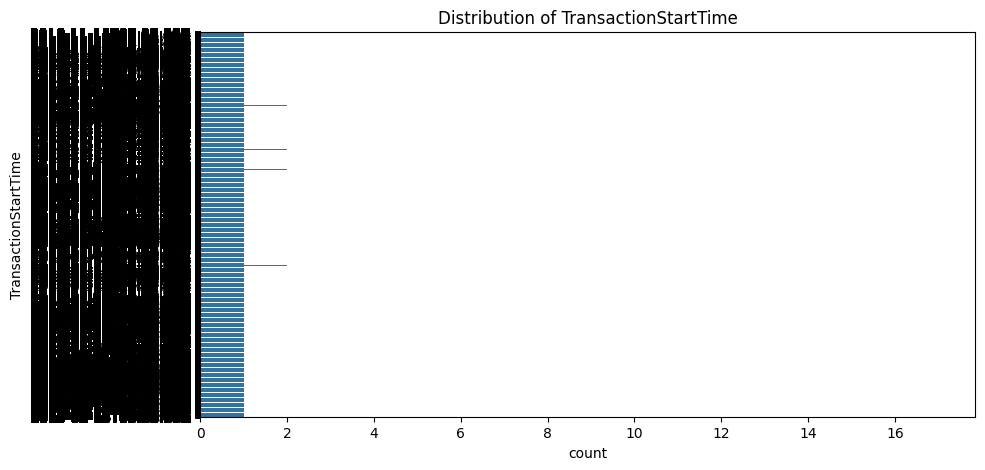

In [12]:
# Distribution of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

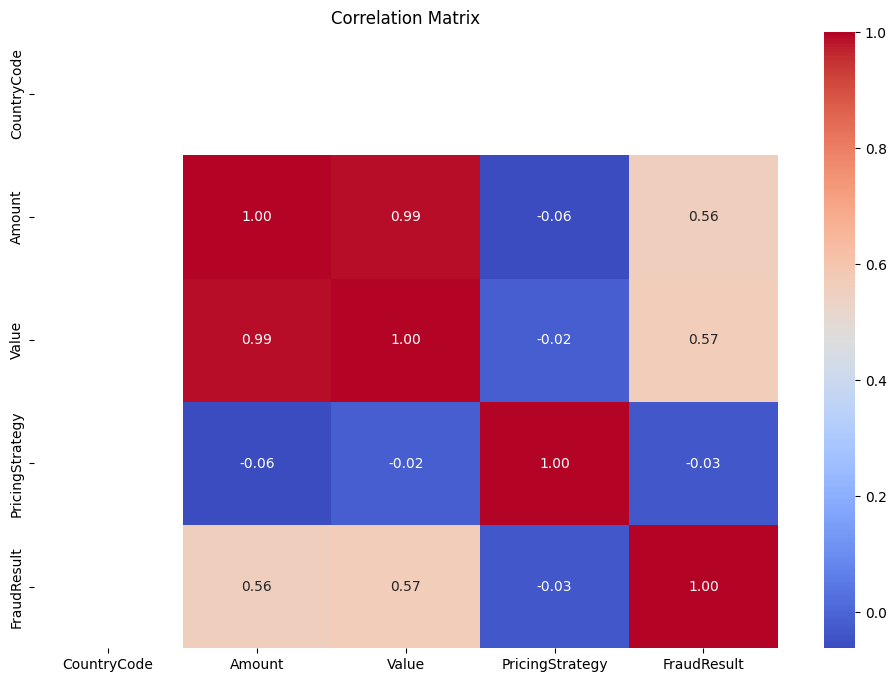

In [14]:
# Correlation matrix
# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Check if there are any numerical columns to proceed
if df_numerical.empty:
    print("No numerical columns available for correlation.")
else:
    # Correlation matrix for numerical columns only
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()


In [15]:
# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


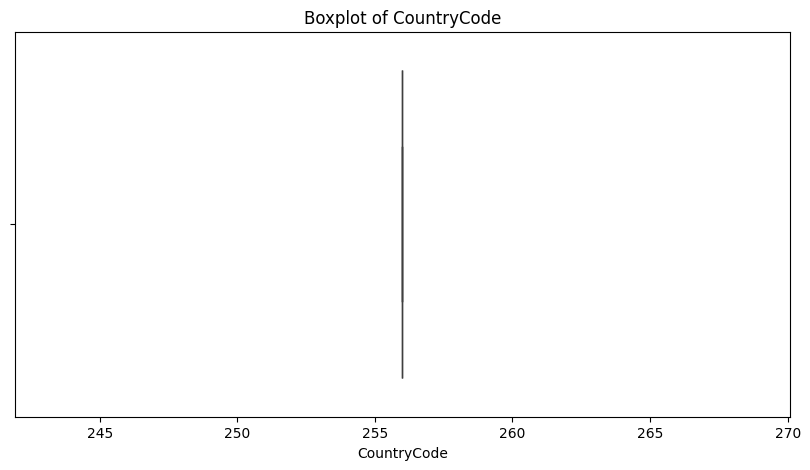

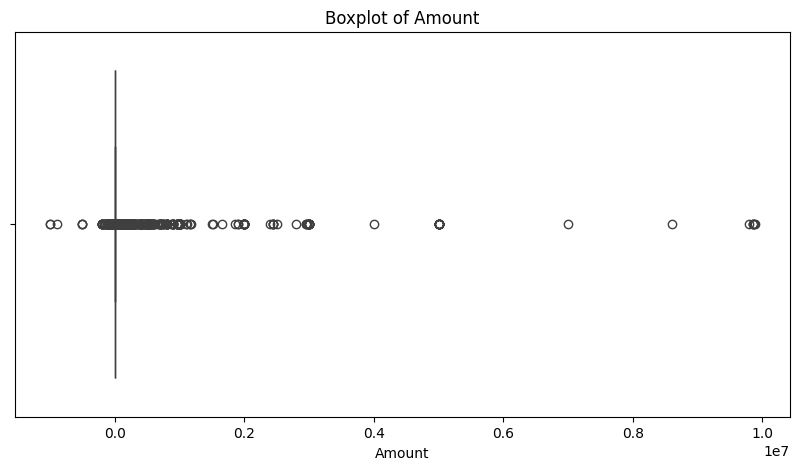

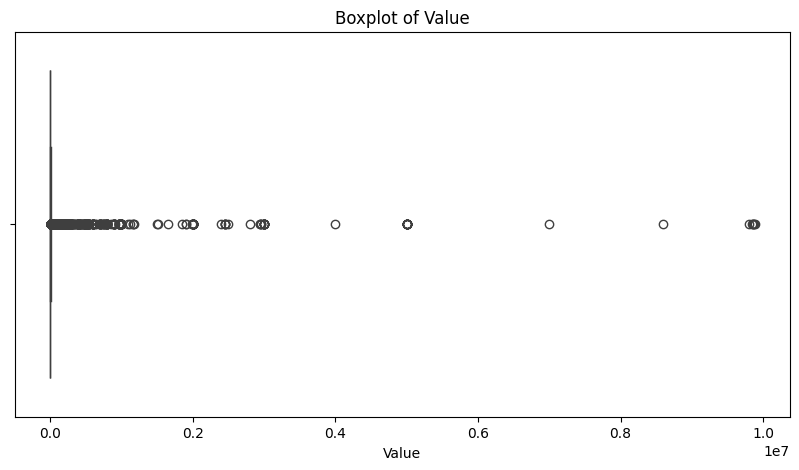

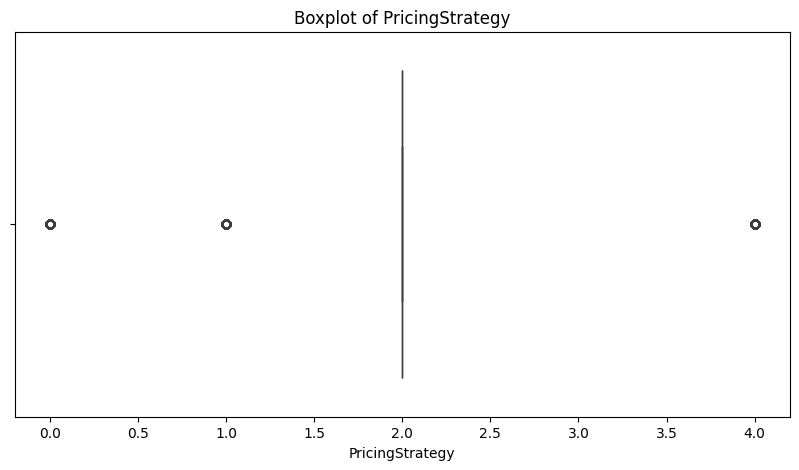

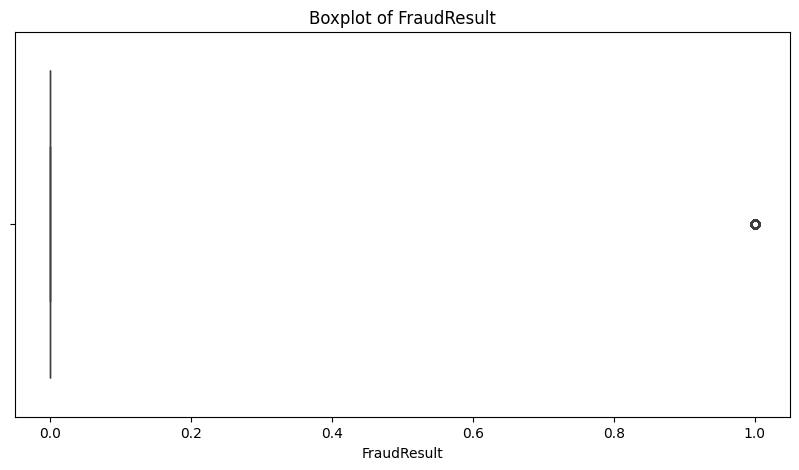

In [16]:
# Box plots for outlier detection
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()